# Análisis exploratorio de datos sobre el conjunto de datos

**Acerca de este conjunto de datos**

Este conjunto de datos contiene información detallada sobre las características de tres especies de pingüinos que habitan en la Antártida. Los datos se recopilaron con el objetivo de estudiar y entender mejor la vida y los comportamientos de estos fascinantes animales. Las variables registradas incluyen la especie del pingüino, las medidas de su pico y aleta, su masa corporal, el nombre de la isla donde se encontró y su sexo. Este conjunto de datos proporciona una excelente oportunidad para realizar un análisis exploratorio de datos y obtener valiosos conocimientos sobre la vida de los pingüinos.



Este es un conjuto de datos obtenido de [Kaggle](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data) donde las columnas mas importantes para este análisis son:
- `species`: Esta columna indica la especie del pingüino, que puede ser Chinstrap, Adélie, o Gentoo.
- `culmen_length_mm`: Esta columna representa la longitud del pico del pingüino en milímetros.
- `culmen_depth_mm`: Esta columna representa la profundidad del pico del pingüino en milímetros.
- `flipper_length_mm`: Esta columna indica la longitud de la aleta del pingüino en milímetros.
- `body_mass_g`: Esta columna indica la masa corporal del pingüino en gramos.
- `island`: Esta columna indica el nombre de la isla donde se encontró el pingüino, que puede ser Dream, Torgersen, o Biscoe, todas ubicadas en el Archipiélago Palmer en la Antártida.
- `sex`: Esta columna indica el sexo del pingüino.

# Instalar librerias necesarias

In [1]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [1]:
!pip install empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info

# Importacion de Librerias

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

# Se establece la apariencia de los graficos

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

# Carga de los Datos

In [6]:
preprocessed_penguins_df = pd.read_csv('/content/sample_data/penguins_size.csv')
preprocessed_penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [7]:
preprocessed_penguins_df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?


In [8]:
(
    preprocessed_penguins_df
    .dtypes
    .value_counts()
)

float64    4
object     3
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [9]:
preprocessed_penguins_df.shape

(344, 7)

## ¿Existen valores nulos explicitos en el conjunto de datos?


In [10]:
(
    preprocessed_penguins_df
    .isnull()
    .any()
)

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?


In [11]:
(
    preprocessed_penguins_df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

sex                  10
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?


In [12]:
(
    preprocessed_penguins_df
    .isnull()
    .sum()
    .sum()
)

18

## ¿Cuál es la proporción de valores nulos por cada variable?


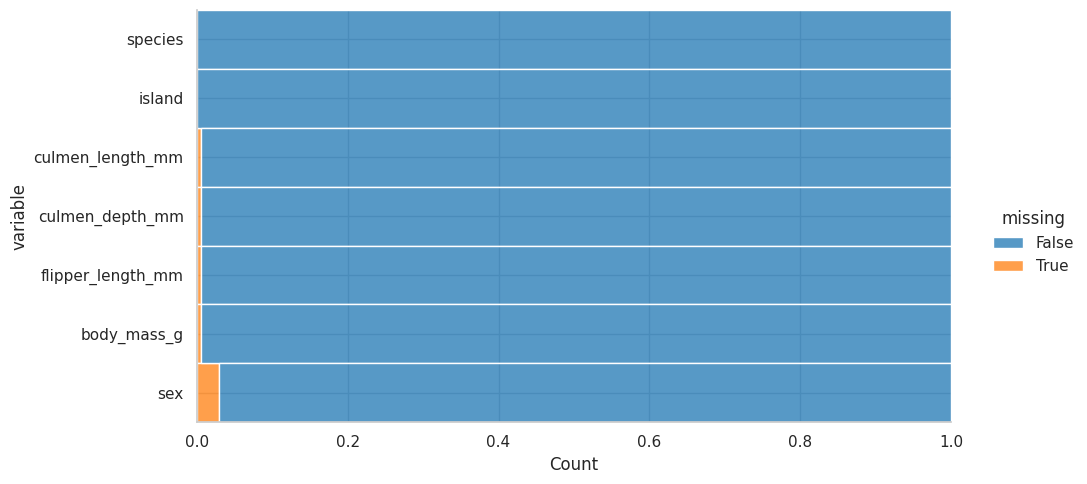

In [13]:
(
    preprocessed_penguins_df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?


<AxesSubplot: >

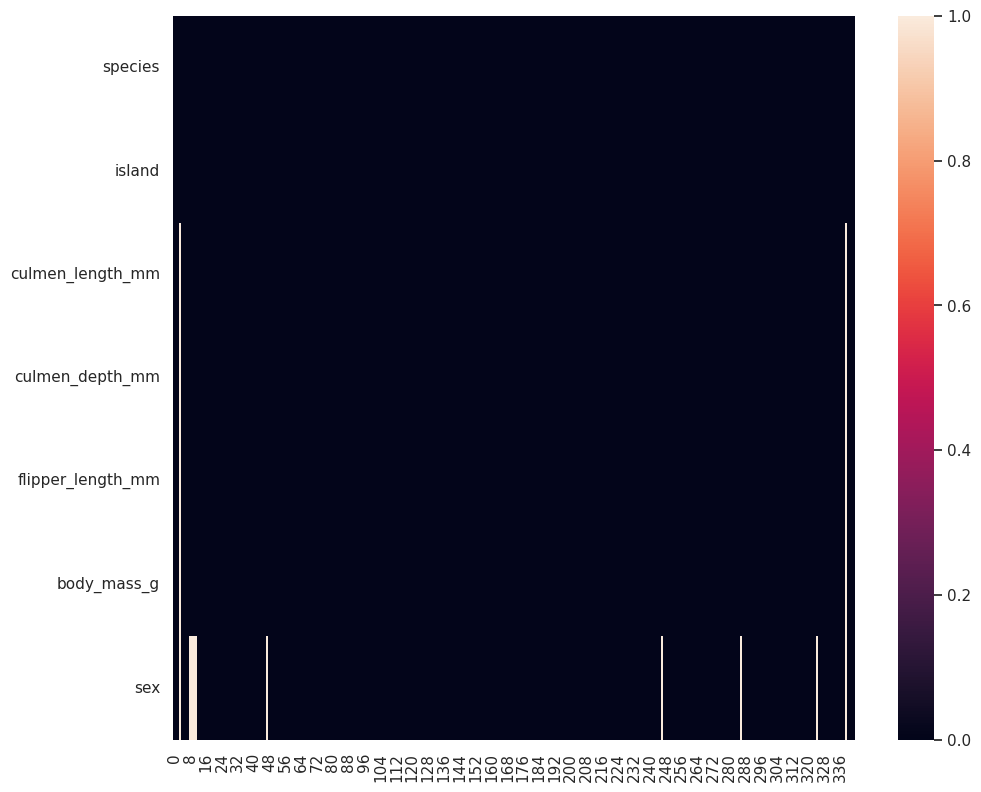

In [14]:
(
    preprocessed_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?


In [15]:
processed_penguins_df = (
    preprocessed_penguins_df
    .dropna()
)

processed_penguins_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# Conteos y proporciones


## Preludio: ¿Qué estadísticos describen el conjunto de datos?


### Todas las variables


In [16]:
processed_penguins_df.describe(include='all')


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,334,334,334.000000,334.000000,334.000000,334.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,146,164,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.994311,17.160479,201.014970,4209.056886,NaN
std,NaN,NaN,5.460521,1.967909,14.022175,804.836129,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.575000,18.700000,213.000000,4793.750000,NaN


### Solo las numéricas


In [17]:
processed_penguins_df.describe(include=[np.number])


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


### Solo categoricas

In [18]:
processed_penguins_df.describe(include=object)


,species,island,sex
count,334,334,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,146,164,168


In [19]:
(
    processed_penguins_df
    .astype(
        {
            'species': 'category',
            'island': 'category',
            'sex': 'category'
        }
    )
    .describe(include=['category', object])
)

,species,island,sex
count,334,334,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,146,164,168


## ¿Cómo visualizar los conteos?


### Pandas

<AxesSubplot: >

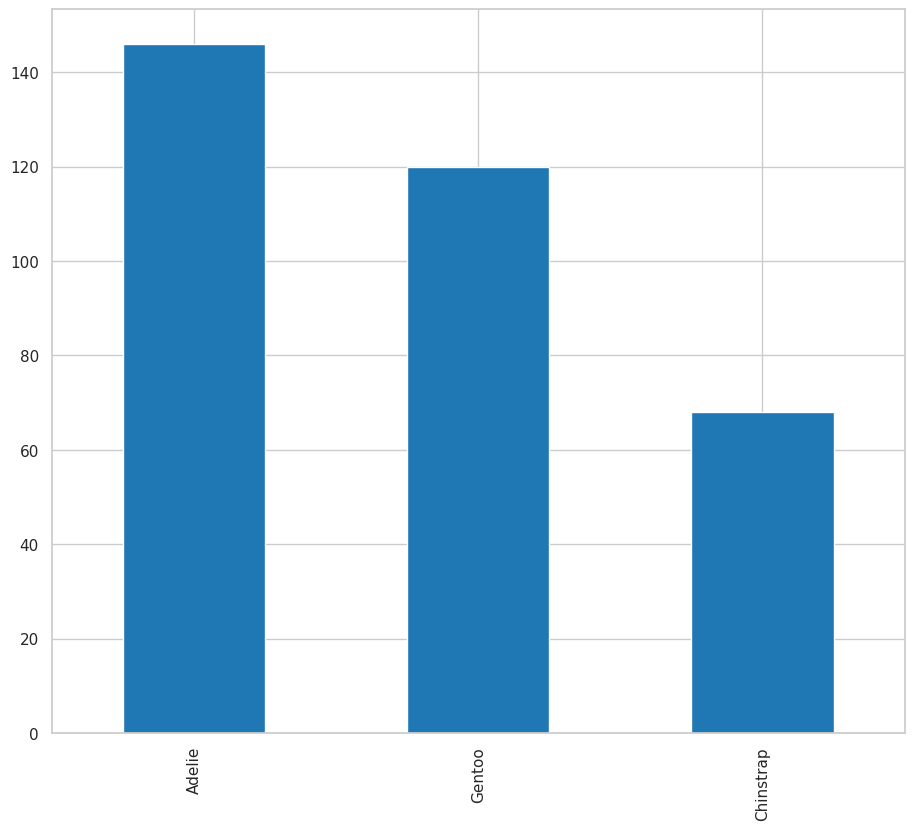

In [20]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar',
        # color=penguin_color.values()
    )
)

### Seaborn

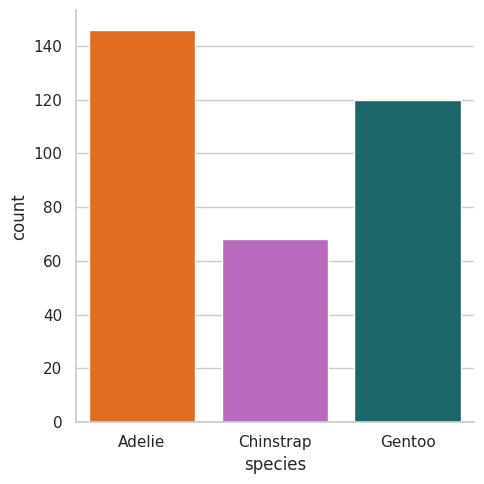

In [21]:
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color,
    # order=processed_penguins_df.value_counts('species', sort=True).index
)

# Medidas de Tendencia Central

## Media o promedio


In [22]:
processed_penguins_df.describe(include=object)

,species,island,sex
count,334,334,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,146,164,168


In [23]:
processed_penguins_df.mean()


<ipython-input-23-690398933604>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()


culmen_length_mm       43.994311
culmen_depth_mm        17.160479
flipper_length_mm     201.014970
body_mass_g          4209.056886
dtype: float64

## Mediana

In [24]:
processed_penguins_df.median()


<ipython-input-24-deb08da4cd61>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.median()


culmen_length_mm       44.5
culmen_depth_mm        17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

## Moda

In [25]:
processed_penguins_df.mode()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,MALE


# Medidas de Dispersión

## ¿Cuál es el valor máximo de las variables?


In [26]:
processed_penguins_df.max()


species                 Gentoo
island               Torgersen
culmen_length_mm          59.6
culmen_depth_mm           21.5
flipper_length_mm        231.0
body_mass_g             6300.0
sex                       MALE
dtype: object

## ¿Cuál es el valor mínimo de las variables?


In [27]:
processed_penguins_df.min()


species              Adelie
island               Biscoe
culmen_length_mm       32.1
culmen_depth_mm        13.1
flipper_length_mm     172.0
body_mass_g          2700.0
sex                       .
dtype: object

## ¿Cuál es el rango de las variables?


In [28]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)


culmen_length_mm       27.5
culmen_depth_mm         8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?


In [29]:
processed_penguins_df.std()


<ipython-input-29-dbfc3293d15e>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.std()


culmen_length_mm       5.460521
culmen_depth_mm        1.967909
flipper_length_mm     14.022175
body_mass_g          804.836129
dtype: float64

## ¿Cuál es el rango intercuartílico?


In [30]:
processed_penguins_df.quantile(0.25)


<ipython-input-30-0fec0c864b88>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.25)


culmen_length_mm       39.5
culmen_depth_mm        15.6
flipper_length_mm     190.0
body_mass_g          3550.0
Name: 0.25, dtype: float64

In [31]:
(
    processed_penguins_df
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('metric')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

<ipython-input-31-eea84a445d9c>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df


,metric,0.75,0.5,0.25,iqr
0,culmen_length_mm,48.575,44.5,39.5,9.075
1,culmen_depth_mm,18.700,17.3,15.6,3.100
2,flipper_length_mm,213.000,197.0,190.0,23.000
3,body_mass_g,4793.750,4050.0,3550.0,1243.750


# ¿Cómo puedo visualizar la distribución de una variable?


# Histograma

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

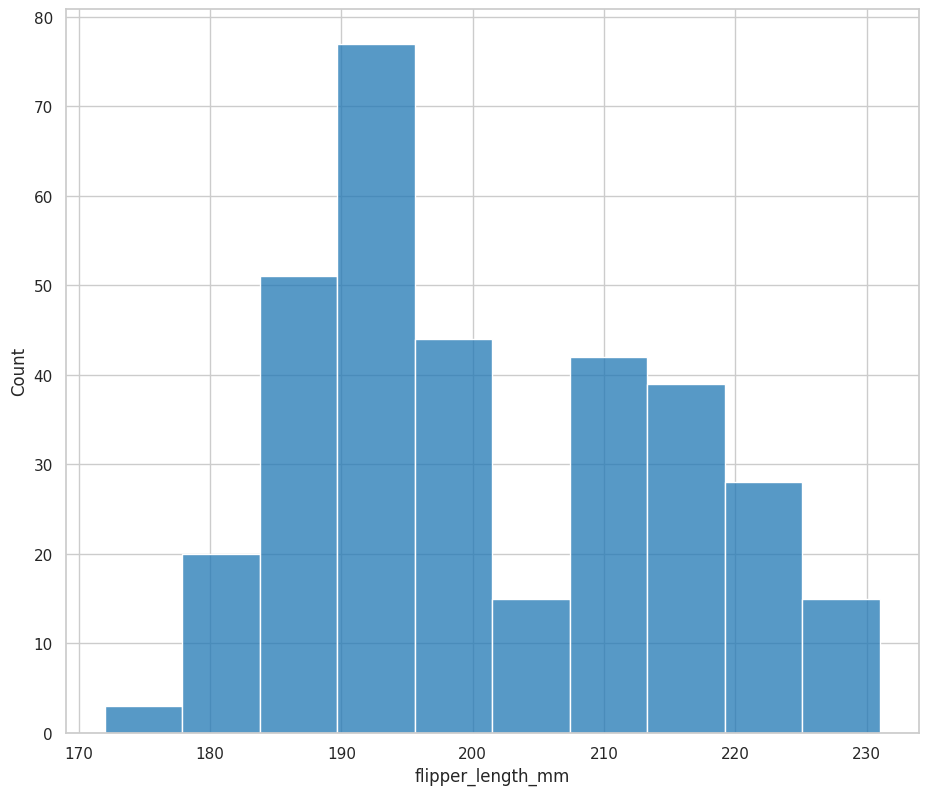

In [32]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
)


## Diagrama de caja / boxplot


<AxesSubplot: xlabel='flipper_length_mm'>

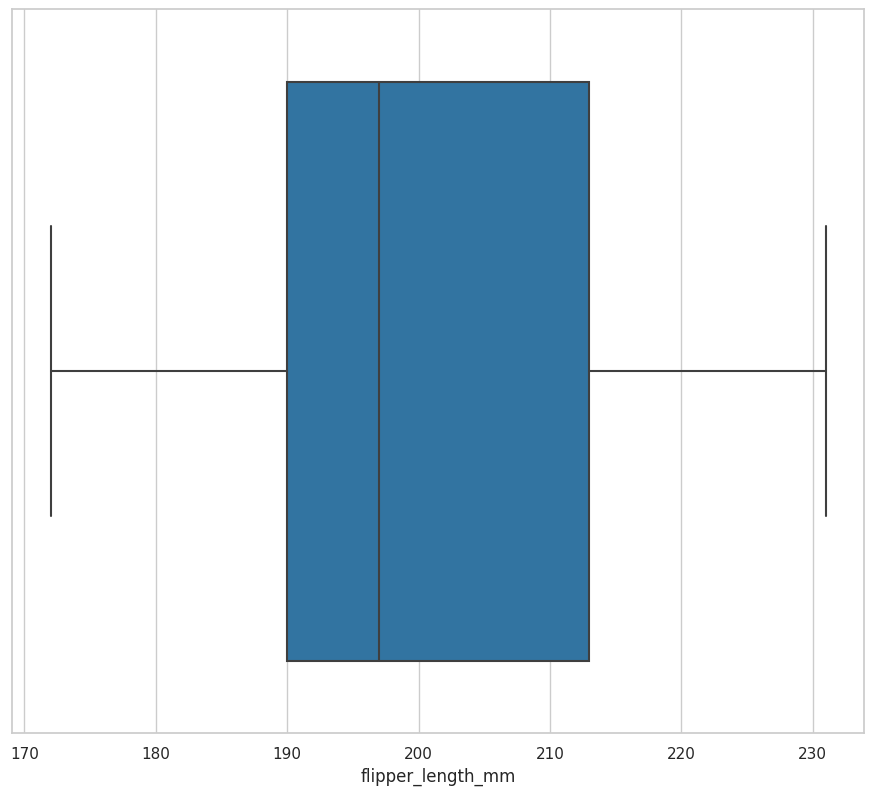

In [33]:
sns.boxplot(
    x=processed_penguins_df.flipper_length_mm,
)

# Estableciendo relaciones: Gráficos de violín y boxplots


<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

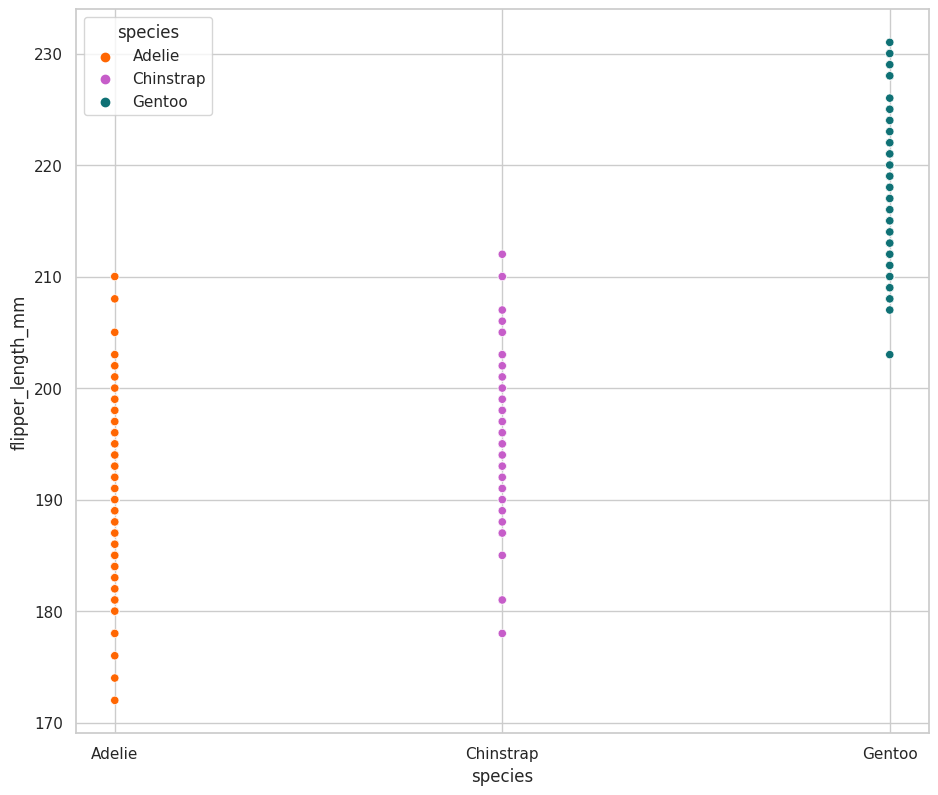

In [47]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

<ipython-input-48-e17293c7f206>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

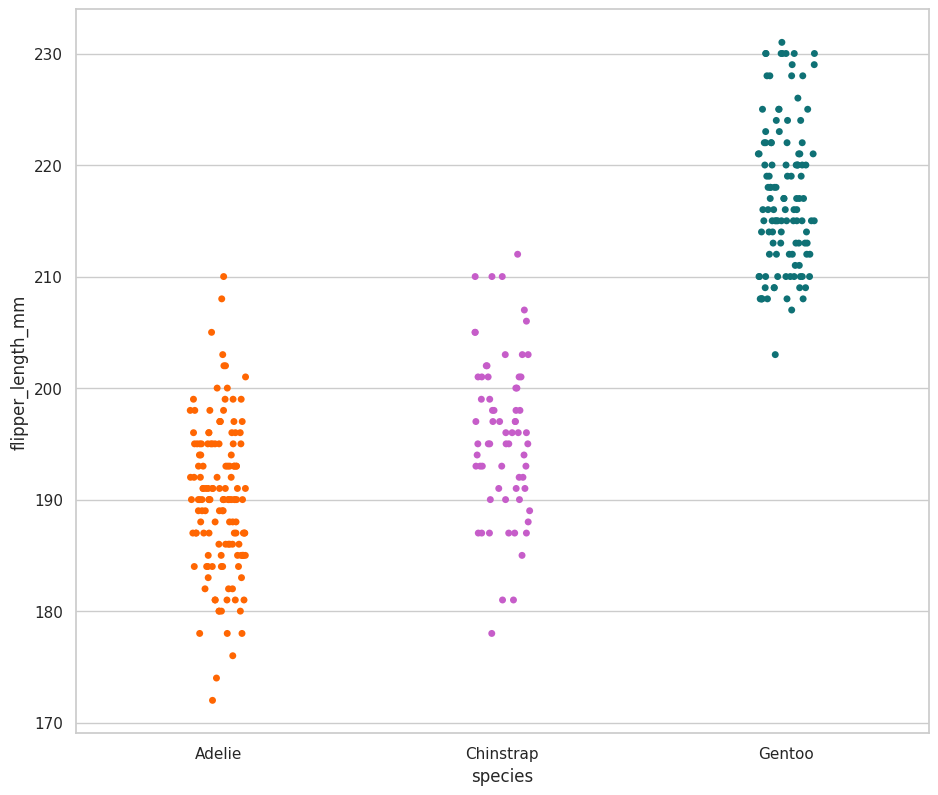

In [48]:
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

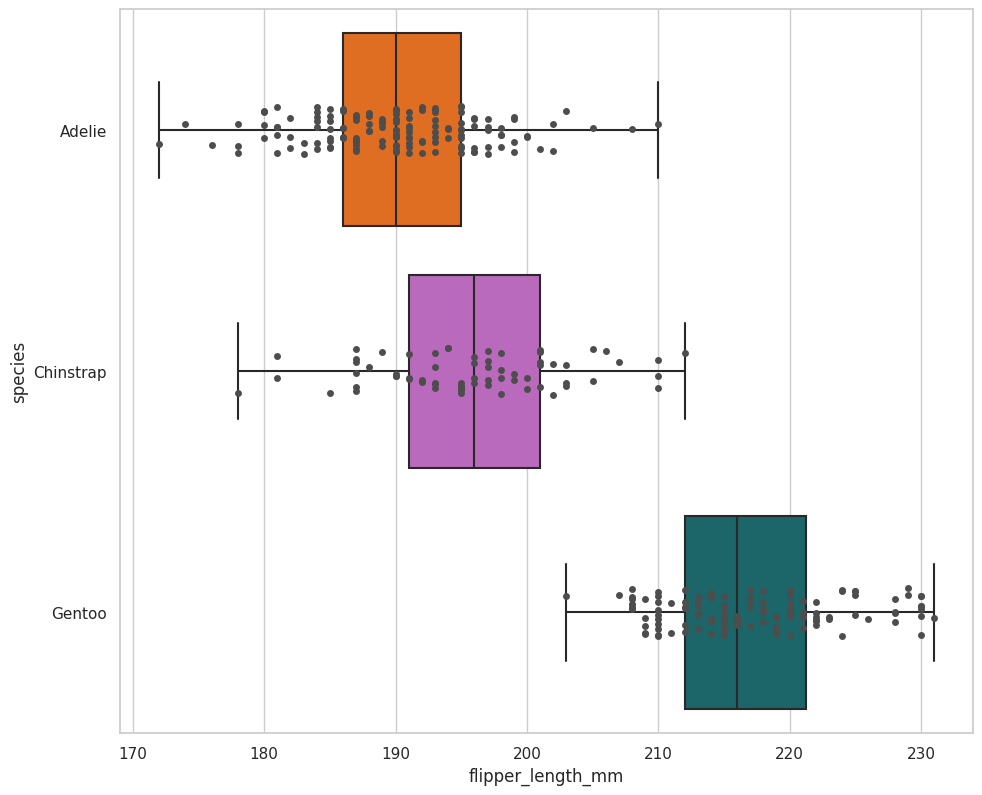

In [49]:
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color,
    whis=np.inf
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='.3'
)

<ipython-input-50-d4ca5718ec76>:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(


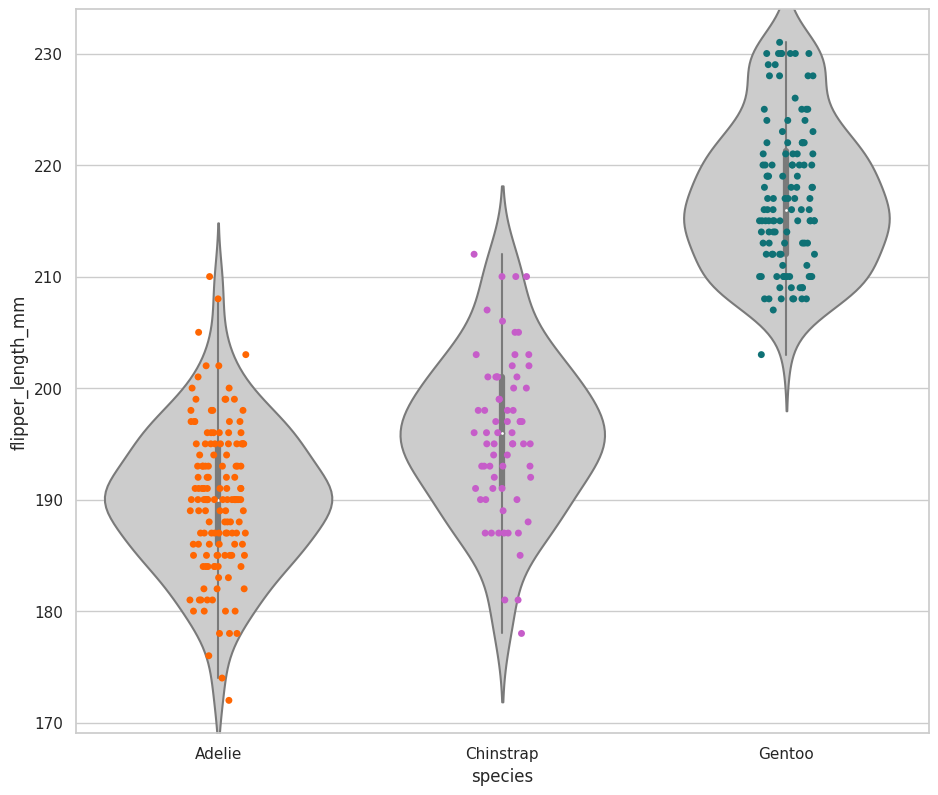

In [50]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

# Estableciendo relaciones: Matrices de correlación


## ¿Existe una correlación lineal entre alguna de nuestras variables?


In [51]:
processed_penguins_df.corr()


<ipython-input-51-54921e00cb11>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


## ¿Como puedo visualizar los coeficientes de correlación?


<ipython-input-52-45bb424c502d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_penguins_df.corr(),


<AxesSubplot: >

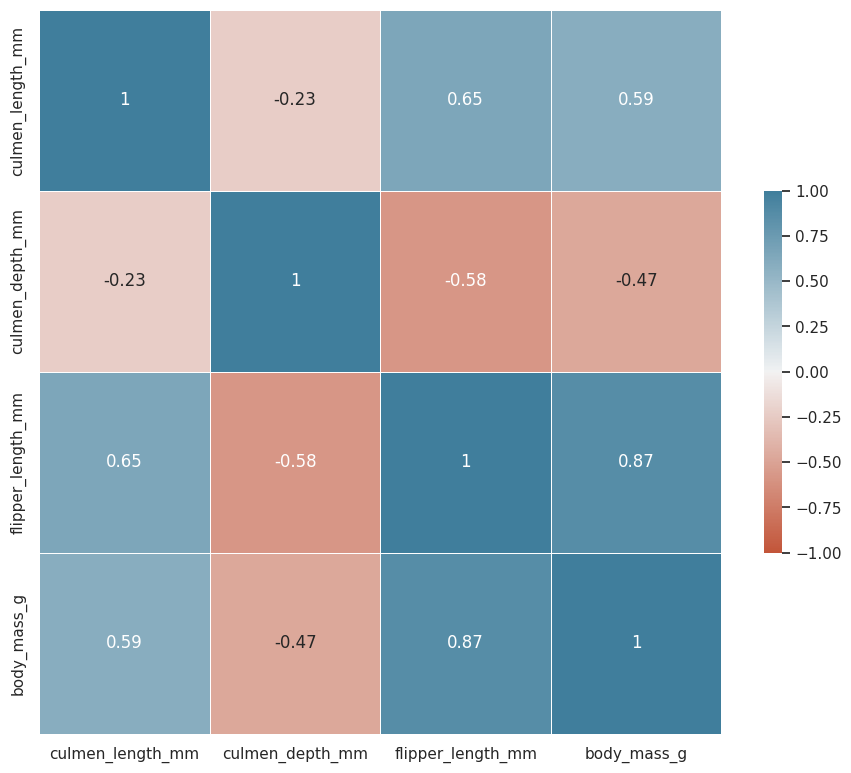

In [52]:
sns.heatmap(
    data=processed_penguins_df.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

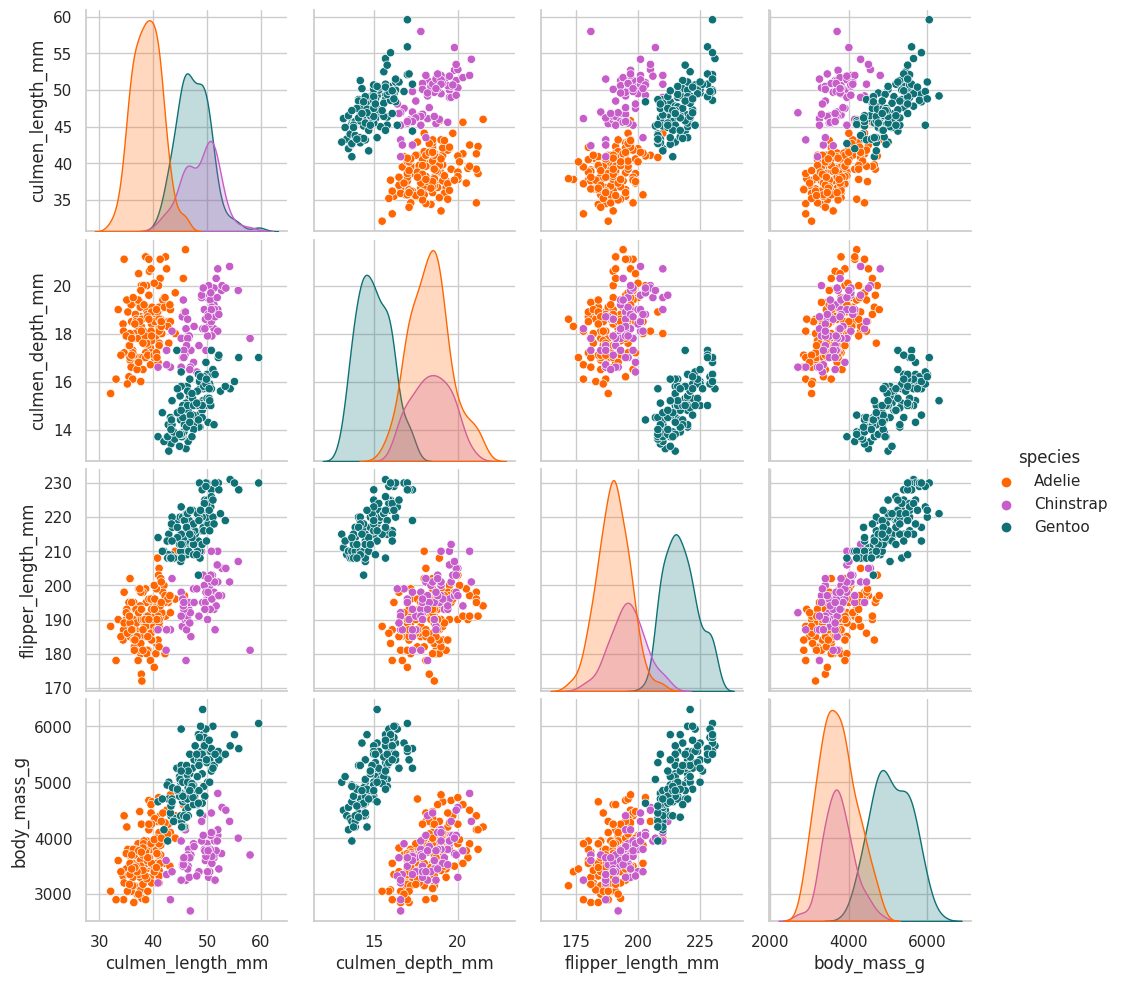

In [57]:
sns.pairplot(data=processed_penguins_df, hue='species', palette=penguin_color)


# Conclusiones

1. **Distribución de especies:** El conjunto de datos contiene principalmente pingüinos Adelie y Gentoo, con una menor cantidad de pingüinos Chinstrap.
2. **Medidas de pico:** La longitud y profundidad del pico varían según la especie. Los pingüinos Adelie tienen picos más cortos y profundos, mientras que los pingüinos Gentoo tienen picos más largos y delgados.
3. **Longitud de la aleta:** La longitud de la aleta también varía según la especie. Los pingüinos Adelie tienen aletas más cortas, mientras que los pingüinos Gentoo y Chinstrap tienen aletas más largas.
4. **Masa corporal:** Los pingüinos Gentoo tienen una masa corporal significativamente mayor que los pingüinos Adelie y Chinstrap.
5. **Distribución de islas:** La mayoría de los pingüinos se encontraron en la isla Dream, seguida de la isla Torgersen y la isla Biscoe.
6. **Distribución de sexo:** El conjunto de datos contiene aproximadamente la misma cantidad de pingüinos machos y hembras.
7. **Correlaciones:** Existe una correlación positiva entre la longitud y la profundidad del pico, así como entre la longitud de la aleta y la masa corporal.
8. **Visualizaciones:** Los gráficos de violín y los boxplots proporcionan una representación visual útil de la distribución de las variables y las diferencias entre especies.
9. **Análisis estadístico adicional:** Se pueden realizar análisis estadísticos adicionales, como pruebas de hipótesis y análisis de regresión, para explorar más a fondo las relaciones entre las variables y sacar conclusiones más específicas.